In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PIL import Image

In [34]:
# Load the data
name = '10-06-2023-23-04-35-908710'
with open(f'../Digit/{name}.pkl', 'rb') as f:
    interactions = pickle.load(f)

i_force = interactions['force']
i_positions = interactions['position']
i_tactile = interactions['tactile']
i_time = interactions['time']

### Position Analysis

In [35]:

positions = []
orientations = []

for entry in i_positions:
    position = entry.position
    orientation = entry.orientation
    positions.append([position.x, position.y, position.z])
    orientations.append([orientation.x, orientation.y, orientation.z, orientation.w])

# Create a DataFrame with specified column names
df = pd.DataFrame({
    'px': [pos[0] for pos in positions],
    'py': [pos[1] for pos in positions],
    'pz': [pos[2] for pos in positions],
    'ox': [ori[0] for ori in orientations],
    'oy': [ori[1] for ori in orientations],
    'oz': [ori[2] for ori in orientations],
    'ow': [ori[3] for ori in orientations]
})

# Print the resulting DataFrame
print(df)

              px        py        pz        ox        oy        oz        ow
0      -0.223125  0.528572  0.149227 -0.462463 -0.540847 -0.700408  0.055141
1      -0.223132  0.528594  0.149231 -0.462465 -0.540842 -0.700410  0.055152
2      -0.223128  0.528572  0.149249 -0.462459 -0.540828 -0.700426  0.055147
3      -0.223108  0.528608  0.149274 -0.462489 -0.540790 -0.700434  0.055156
4      -0.223121  0.528575  0.149243 -0.462477 -0.540835 -0.700407  0.055154
...          ...       ...       ...       ...       ...       ...       ...
311035 -0.013656  0.738160  0.149609  0.462802 -0.542296 -0.055168  0.699061
311036 -0.013614  0.738155  0.149639  0.462830 -0.542282 -0.055189  0.699051
311037 -0.013659  0.738147  0.149617  0.462823 -0.542271 -0.055133  0.699069
311038 -0.013633  0.738156  0.149669  0.462813 -0.542298 -0.055189  0.699050
311039 -0.013657  0.738150  0.149620  0.462775 -0.542306 -0.055154  0.699072

[311040 rows x 7 columns]


In [ ]:
# the dataset is too large to plot in one go, so we will plot it in batches
# the dataset is divided into 10 batches
# we will split the dataset when we detect a large change in the position of the end effector (distance > 0.05)

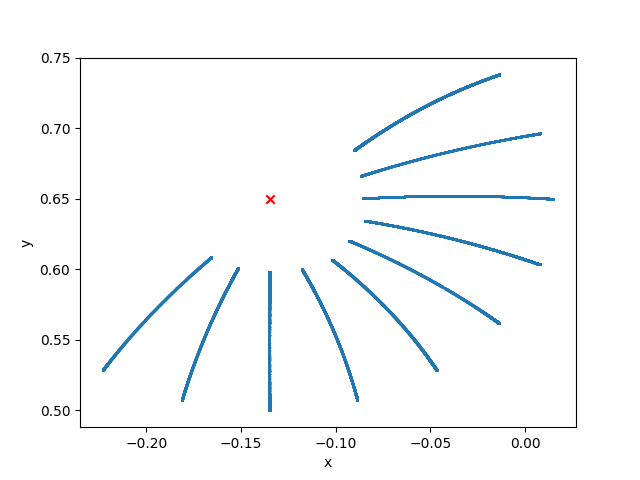

In [36]:
# graph the df: px against py as scatter plot
fig, ax = plt.subplots()

# Extract position and quaternion components from the DataFrame
x = df['px'].to_numpy()
y = df['py'].to_numpy()
z = df['pz'].to_numpy()
ox = df['ox'].to_numpy()
oy = df['oy'].to_numpy()
oz = df['oz'].to_numpy()
ow = df['ow'].to_numpy()

# make scatter markers smallest possible
ax.scatter(x, y, marker='.', s=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')

center = [-0.135,0.650]
ax.scatter(center[0], center[1], marker='x', color='red')

# set axis limits
axis_offset = 0.18
# ax.set_xlim(center[0]-axis_offset, center[0]+axis_offset)
# ax.set_ylim(center[1]-axis_offset, center[1]+axis_offset)

plt.show()

### Force Analysis

<Axes: >

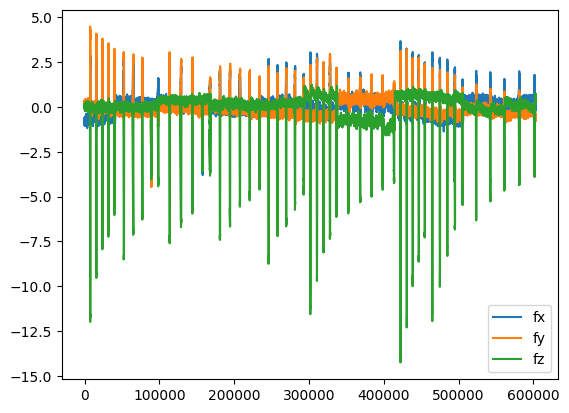

In [6]:
# turn the force data into a dataframe, with column names fx, fy, fz
forcedf = pd.DataFrame(i_force, columns=['fx', 'fy', 'fz'])

# apply moving average filter to the force data
forcedf_smoothed = forcedf.rolling(10).mean()
forcedf_smoothed.plot()

In [7]:
# plot absolute force
forcedf['abs'] = forcedf.apply(lambda row: (row.fx**2 + row.fy**2 + row.fz**2)**0.5, axis=1)

100642

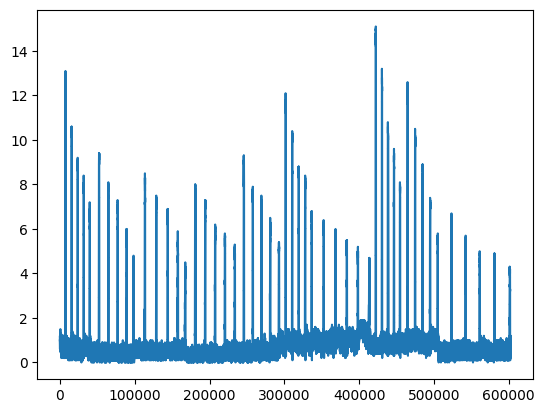

In [8]:
# discritize the absolute force values in increments of n 
n = 0.1
forcedf['abs'] = forcedf['abs'].apply(lambda x: round(x / n) * n)

# plot the absolute force
forcedf['abs'].plot()
len(forcedf['abs'][forcedf['abs'] > 1])


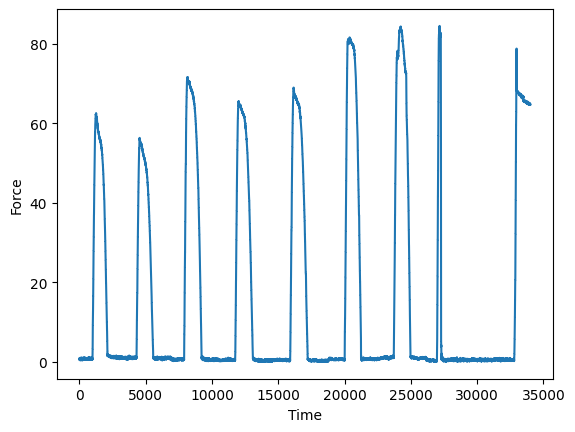

In [23]:
# extract the index of local maxima for the force
# only consider the force in the z direction
# and if the force is greater than 10
forcedf['z'] = forcedf['fz'].apply(lambda x: abs(x))
forcedf['max'] = forcedf['fz'].rolling(window=10, center=True).max()
forcedf['max'] = forcedf['max'].apply(lambda x: x if x > 10 else 0)
forcedf['max'] = forcedf['max'].shift(-5)
forcedf['max'] = forcedf['max'].fillna(0)
forcedf['max'] = forcedf['max'].astype(int)
# plot these maxima with a star marker on the graph
plot = forcedf['abs'].plot()
plot.set_xlabel('Time')
plot.set_ylabel('Force')
plot.scatter(forcedf[forcedf['max'] > 0].index, forcedf[forcedf['max'] > 0]['abs'], marker='*', color='red')
plt.show()

### Tactile Data Analysis

130046

In [34]:
# using the local maximas, extract the images from interactions['tactile']
# and save them to a folder
# the images are saved as png files

# create a folder to save the images
import os
if not os.path.exists(f'images/{name}'):
    os.makedirs(f'images/{name}')

# from the absolute force values, extract the tactile images from i_tactile where the force is above a threshold
threshold = 5
extract = forcedf['abs']>threshold
for i,e in enumerate(extract):
    if e:
        # print index i and flush the output buffer
        print(i, end='\r', flush=True)
        im = Image.fromarray(i_tactile[i])
        im.save(f'images/{name}/{i}.png')


1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212


KeyboardInterrupt: 

In [ ]:


# extract the images
# save them with a name corresponding to the absolute value of the local maxima

for i in forcedf[forcedf['max'] > 0].index:
    # extract the image
    img = interactions['tactile'][i]
    # save the image
    Image.fromarray(img).save(f'images/{name}' + str(forcedf.loc[i, 'abs']) + '.png')


In [4]:
import math
n = 20

# Define the parameters of the circle
cx = 0
cy = 0.5
r = 0.1

# create list of waypoints
waypoints_list = []

for i in range(n):

    angle = 2 * math.pi * i / n
    x = cx + r * math.cos(angle)
    y = cy + r * math.sin(angle)

    waypoints_list.append([x,y])

#remove elements of the list where abs(y) > 0.5
waypoints_list = [[x,y] for [x,y] in waypoints_list if abs(y) <= 0.5]

# split list into two lists: one with positive x values and one with negative x values
waypoints_list_pos = [[x,y] for [x,y] in waypoints_list if x >= 0]
waypoints_list_neg = [[x,y] for [x,y] in waypoints_list if x < 0]
# sort both list by increasing y values
waypoints_list_pos.sort(key=lambda x: x[1])
waypoints_list_neg.sort(key=lambda x: x[1])
#append the negative list to the positive list into waypoints_list
waypoints_list = waypoints_list_pos + waypoints_list_neg

for (i,(x,y)) in enumerate(waypoints_list):

    # calculate the angle of the arc formed by the current waypoint and the previous waypoint
    # the arc is formed on a circle with radius r, and center (cx,cy)

    if i == 0:
        angle = 0
    else:
        xprev = waypoints_list[i-1][0]
        yprev = waypoints_list[i-1][1]
        # print prev and current coordinates
        print(xprev, yprev, x, y)

        delta_x_prev = xprev - cx
        delta_y_prev = yprev - cy
        delta_x = x - cx
        delta_y = y - cy
        
        # Calculate the angles
        theta_prev = math.atan2(delta_y_prev, delta_x_prev)
        theta = math.atan2(delta_y, delta_x)
        
        # Calculate the angle of the arc
        angle = theta - theta_prev
        print(angle)

0.030901699437494726 0.40489434837048466 0.05877852522924729 0.41909830056250524
0.3141592653589792
0.05877852522924729 0.41909830056250524 0.08090169943749474 0.4412214747707527
0.31415926535897964
0.08090169943749474 0.4412214747707527 0.09510565162951536 0.46909830056250523
0.31415926535897903
0.09510565162951536 0.46909830056250523 0.1 0.5
0.3141592653589796
0.1 0.5 -1.8369701987210297e-17 0.4
-1.5707963267948968
-1.8369701987210297e-17 0.4 -0.030901699437494757 0.40489434837048466
-0.3141592653589793
-0.030901699437494757 0.40489434837048466 -0.05877852522924733 0.41909830056250524
-0.3141592653589791
-0.05877852522924733 0.41909830056250524 -0.08090169943749476 0.4412214747707527
-0.3141592653589793
-0.08090169943749476 0.4412214747707527 -0.09510565162951538 0.4690983005625053
-0.31415926535897976
-0.09510565162951538 0.4690983005625053 -0.1 0.5
5.969026041820607


In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# unpickle the data in ../path.pkl
with open('../../../../path.pkl', 'rb') as f:
    pathf = pickle.load(f)

# flatten the path if it is a list of lists
path = []
for sublist in pathf:
    if isinstance(sublist, list):
        for item in sublist:
            path.append(item)
    else:
        path.append(sublist)

positions = []
orientations = []

for entry in path:
    position = entry.position
    orientation = entry.orientation
    positions.append([position.x, position.y, position.z])
    orientations.append([orientation.x, orientation.y, orientation.z, orientation.w])

# Create a DataFrame with specified column names
df = pd.DataFrame({
    'px': [pos[0] for pos in positions],
    'py': [pos[1] for pos in positions],
    'pz': [pos[2] for pos in positions],
    'ox': [ori[0] for ori in orientations],
    'oy': [ori[1] for ori in orientations],
    'oz': [ori[2] for ori in orientations],
    'ow': [ori[3] for ori in orientations]
})

# Print the resulting DataFrame
print(df)

            px        py        pz        ox        oy        oz        ow
0    -0.134934  0.509974  0.149395 -0.271692 -0.657280 -0.649312  0.269371
1    -0.135000  0.510000  0.149372  0.271825  0.657254  0.649359 -0.269187
2    -0.135021  0.510039  0.149350 -0.272155 -0.657224 -0.649322  0.269013
3    -0.135007  0.510066  0.149359 -0.272136 -0.657206 -0.649344  0.269025
4    -0.134988  0.510063  0.149352 -0.272160 -0.657212 -0.649338  0.269001
...        ...       ...       ...       ...       ...       ...       ...
8957 -0.083035  0.716834  0.150833  0.503768 -0.502537  0.000512  0.702619
8958 -0.083051  0.716802  0.150817  0.503749 -0.502532  0.000556  0.702637
8959 -0.083053  0.716774  0.150781  0.503745 -0.502513  0.000537  0.702653
8960 -0.083081  0.716740  0.150813  0.503740 -0.502520  0.000538  0.702652
8961 -0.083135  0.716726  0.150796  0.503746 -0.502531  0.000535  0.702639

[8962 rows x 7 columns]


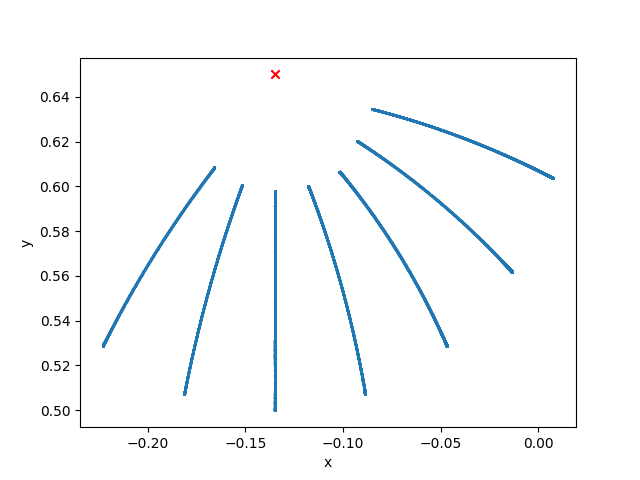

In [7]:
# graph the df: px against py as scatter plot
fig, ax = plt.subplots()

# Extract position and quaternion components from the DataFrame
x = df['px'].to_numpy()
y = df['py'].to_numpy()
z = df['pz'].to_numpy()
ox = df['ox'].to_numpy()
oy = df['oy'].to_numpy()
oz = df['oz'].to_numpy()
ow = df['ow'].to_numpy()

# make scatter markers smallest possible
ax.scatter(x, y, marker='.', s=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')

center = [-0.135,0.650]
ax.scatter(center[0], center[1], marker='x', color='red')

plt.show()

In [4]:
from tf.transformations import euler_from_quaternion

# convert quaternions to euler angles
roll, pitch, yaw = [], [], []

for i in range(len(ox)):
    euler = euler_from_quaternion([ox[i], oy[i], oz[i], ow[i]])
    roll.append(euler[0])
    pitch.append(euler[1])
    yaw.append(euler[2])

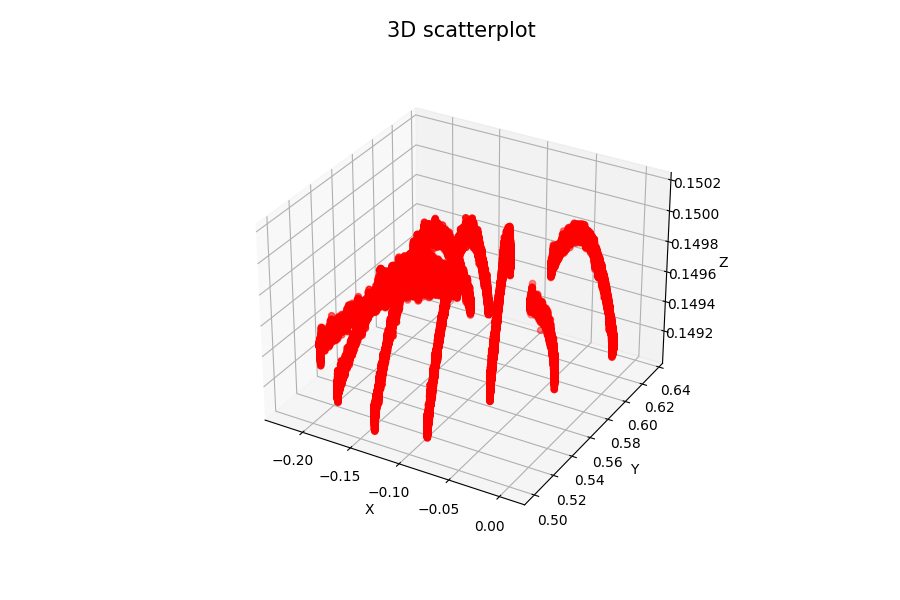

In [8]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, color='red')

ax.set_title("3D scatterplot", pad=25, size=15)
ax.set_xlabel("X") 
ax.set_ylabel("Y") 
ax.set_zlabel("Z")

plt.show()

In [8]:
# plot the yaw angle against time
fig, ax = plt.subplots()

ax.plot(yaw)
ax.set_xlabel('time')
plt.show()

<IPython.core.display.Javascript object>

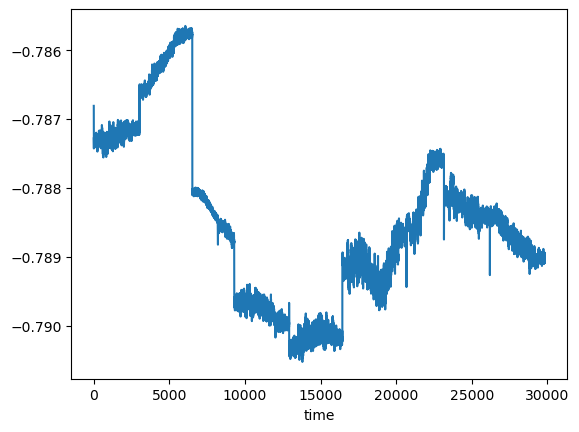

In [6]:
# plot the yaw angle against time
fig, ax = plt.subplots()

ax.plot(pitch)
ax.set_xlabel('time')
plt.show()

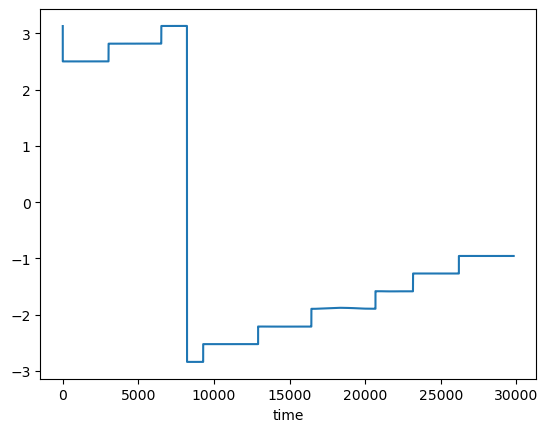

In [7]:
# plot the yaw angle against time
fig, ax = plt.subplots()

ax.plot(yaw)
ax.set_xlabel('time')
plt.show()

In [51]:
# obtain maxima of columns 
print(df['py'].max())

0.571656377752172


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from pyquaternion import Quaternion
import numpy as np

def visualizeOrientation(dataframe):
    fig, ax = plt.subplots()

    # Extract position and quaternion components from the DataFrame
    x = dataframe['px'].to_numpy()
    y = dataframe['py'].to_numpy()
    ox = dataframe['ox'].to_numpy()
    oy = dataframe['oy'].to_numpy()
    oz = dataframe['oz'].to_numpy()
    ow = dataframe['ow'].to_numpy()

    # Plot the robot position
    ax.plot(x, y)

    # Plot orientation vectors
    for i in range(len(dataframe)):
        if i % 100 == 0:
            pos = np.array([x[i], y[i]])
            quat = Quaternion(ox[i], oy[i], oz[i], ow[i])
            orientation_vector = quat.rotate(np.array([1, 0, 0]))  # Get the orientation vector (1, 0, 0) rotated by the quaternion

            arrow = FancyArrowPatch(pos, pos + 0.2 * orientation_vector[:2], arrowstyle='->', color='red')
            ax.add_patch(arrow)

    # Set plot limits
    # ax.set_xlim([min(x)-1, max(x)+1])
    # ax.set_ylim([min(y)-1, max(y)+1])

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

In [35]:
from geometry_msgs.msg import Pose

pose = Pose()
pose

position: 
  x: 0.0
  y: 0.0
  z: 0.0
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 0.0